# Predict Dow Jones Industrial Average based on Top 25 news in the USA from 2008
Lets try to predict Dow Jones index based on news. To clarify, before I start It is going to be really hard job to try predict stocks because many factors have the impact on it but one of the factor is news from the world! So, let's begin :)

In [26]:
import re
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments


In [3]:
stock_data=pd.read_csv("upload_DJIA_table.csv")
news_data_1=pd.read_csv("Combined_News_DJIA.csv")
news_data_2=pd.read_csv("RedditNews.csv")

In [4]:
news_data_1.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [76]:
news_data_2.head()

,Date,News
0,2016-07-01,a 117-year-old woman in mexico city finally re...
1,2016-07-01,imf chief backs athens as permanent olympic host
2,2016-07-01,the president of france says if brexit won so ...
3,2016-07-01,british man who must give police 24 hours' not...
4,2016-07-01,100+ nobel laureates urge greenpeace to stop o...


## Comment
Lets, take a look at the datasets. We have 3 datasets: 
1. News_data_1 there are 

In [6]:
null_mask = news_data_1.isnull().any(axis=1)
null_rows = news_data_1[null_mask]
null_rows

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
277,2009-09-15,1,b'The Church of Scientology won\'t be dissolve...,b'New virus from rats can kill 80 per cent of ...,b'The gruesome spectacle of dolphins being sla...,b'The End of Innocence in Afghanistan: \'The G...,b'France approves Internet piracy bill',b'The Rural Doctors Association says right now...,b'Al Jazeera English - Africa - Shabab to aven...,"b""How Sri Lanka governs through detentions - S...",...,b'In an equine echo of the controversy surroun...,b'UPDATE: 5-New York homes raided in terrorism...,b'Population Growth Impeding Progress on the M...,b'Global Population to Reach 7 Billion by 2011',b'Government Funded Feminist Porn ',b'Can someone enlighten me re:Holy Land disput...,b'Human Rights Watch official suspended for co...,NaN,NaN,NaN
348,2009-12-24,1,b'Woman knocks down Pope Benedict at Christmas...,b'Ugandan President Museveni says he will bloc...,"b""Venezuela's Chavez threatens to kick out car...",b'Woman who knocked down pope had pasta in her...,"b'450 people from 21 countries, including 30 f...",b'Chvez declares Angel Falls is no more: World...,b'Drug tests catch out 10 police (UK)',"b'Once the worlds fourth-largest lake, the Ara...",...,b'Pig farts spark Australia gas scare - I shit...,b'Bin Laden daughter flees to Saudi embassy in...,b'Traumatic Brain Injuries: Growing evidence ...,b'The Pakistan Supreme Court has ordered the P...,"b""Here's a video the Taliban released this mor...",b'Fireworks set off aboard airliner',"b'Five VA men may face terrorism charges, Paki...","b""Ayatollah Montazeri's Legacy: In death he m...",NaN,NaN
681,2011-04-21,1,"Director of ""Restrepo"" and Photographer Chris ...",Everyone within 20km of Fukushima will be forc...,Bahrain: Activist Zaynab Al-Khawaja's letter t...,"More than 80,000 people are claiming incapacit...",Libya: 'mission creep' claims as UK sends in m...,Japan considers banning access to evacuation zone,Chinese oil giant Sinopec has stopped exportin...,6.0-magnitude earthquake strikes off east coas...,...,Russian migration official fired in racism row...,Small amounts of radioactive iodine found in b...,"War photographer, Oscar-nominated film directo...",Effeminate boys are being sent to a special ca...,Japan Government Declares 12-Mile Area Around ...,TEPCO admitted Wednesday that nuclear fuel in ...,Fukushima evacuees face arrest if they return ...,Prince Charles wins some kind of a record,NaN,NaN


In [7]:
most_frequent = news_data_1['Top22'].mode()[0]
news_data_1['Top24'].fillna(most_frequent, inplace=True)
news_data_1['Top25'].fillna(most_frequent, inplace=True)

In [8]:
news_data_1.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    0
Top25    0
dtype: int64

## Comment

In [9]:
news_data_2.isnull().sum()

Date    0
News    0
dtype: int64

## Comment

In [18]:
for col in news_data_1.columns:
    if news_data_1[col].dtype == 'object':
        news_data_1[col] = news_data_1[col].fillna("").apply(lambda x: x.lower().replace(',', ''))

for col in news_data_2.columns:
    if news_data_2[col].dtype == 'object':
        news_data_2[col] = news_data_2[col].fillna("").apply(lambda x: x.lower().replace(',', ''))
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
news_data_1['Date'] = pd.to_datetime(news_data_1['Date'])
news_data_2['Date'] = pd.to_datetime(news_data_2['Date'])
news_data_1['Combined_News'] = news_data_1.iloc[:, 2:].apply(lambda row: ' '.join(row.dropna().values.astype(str)), axis=1)


## Comment

In [19]:
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(news_data_1['Combined_News']).toarray()
y = news_data_1['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



=== Wyniki dla Unigramów ===
Model: Logistic Regression
  Accuracy: 0.4799
  AUC-ROC: 0.4829
  Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.49      0.45       171
           1       0.55      0.48      0.51       227

    accuracy                           0.48       398
   macro avg       0.48      0.48      0.48       398
weighted avg       0.49      0.48      0.48       398

  Confusion Matrix:
[[ 83  88]
 [119 108]]

Model: Random Forest
  Accuracy: 0.5126
  AUC-ROC: 0.4675
  Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       171
           1       0.57      0.59      0.58       227

    accuracy                           0.51       398
   macro avg       0.50      0.50      0.50       398
weighted avg       0.51      0.51      0.51       398

  Confusion Matrix:
[[ 70 101]
 [ 93 134]]

Model: Naive Bayes
  Accuracy: 0.4899
  AUC-ROC: 0.4653


/opt/anaconda3/envs/First_Assignment/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:55:10] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
  Accuracy: 0.4975
  AUC-ROC: 0.5005
  Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       171
           1       0.56      0.54      0.55       227

    accuracy                           0.50       398
   macro avg       0.49      0.49      0.49       398
weighted avg       0.50      0.50      0.50       398

  Confusion Matrix:
[[ 75  96]
 [104 123]]


=== Wyniki dla Bigramów ===
Model: Logistic Regression
  Accuracy: 0.4899
  AUC-ROC: 0.5010
  Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       171
           1       0.56      0.51      0.53       227

    accuracy                           0.49       398
   macro avg       0.49      0.49      0.49       398
weighted avg       0.50      0.49      0.49       398

  Confusion Matrix:
[[ 80  91]
 [112 115]]

Model: Random Forest
  Accuracy: 0.5000
  AUC-ROC: 0.5102
  Cla

/opt/anaconda3/envs/First_Assignment/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [11:55:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
  Accuracy: 0.4623
  AUC-ROC: 0.4553
  Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.41      0.40       171
           1       0.53      0.50      0.52       227

    accuracy                           0.46       398
   macro avg       0.46      0.46      0.46       398
weighted avg       0.47      0.46      0.46       398

  Confusion Matrix:
[[ 70 101]
 [113 114]]


Porównanie wyników dla unigramów i bigramów:
                    Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC  \
3  Support Vector Machine  0.520101   0.562937  0.709251  0.627680  0.507458   
1           Random Forest  0.512563   0.570213  0.590308  0.580087  0.467488   
4                 XGBoost  0.497487   0.561644  0.541850  0.551570  0.500528   
2             Naive Bayes  0.489950   0.556075  0.524229  0.539683  0.465312   
0     Logistic Regression  0.479899   0.551020  0.475771  0.510638  0.482907   
3  Support Vector Machine 

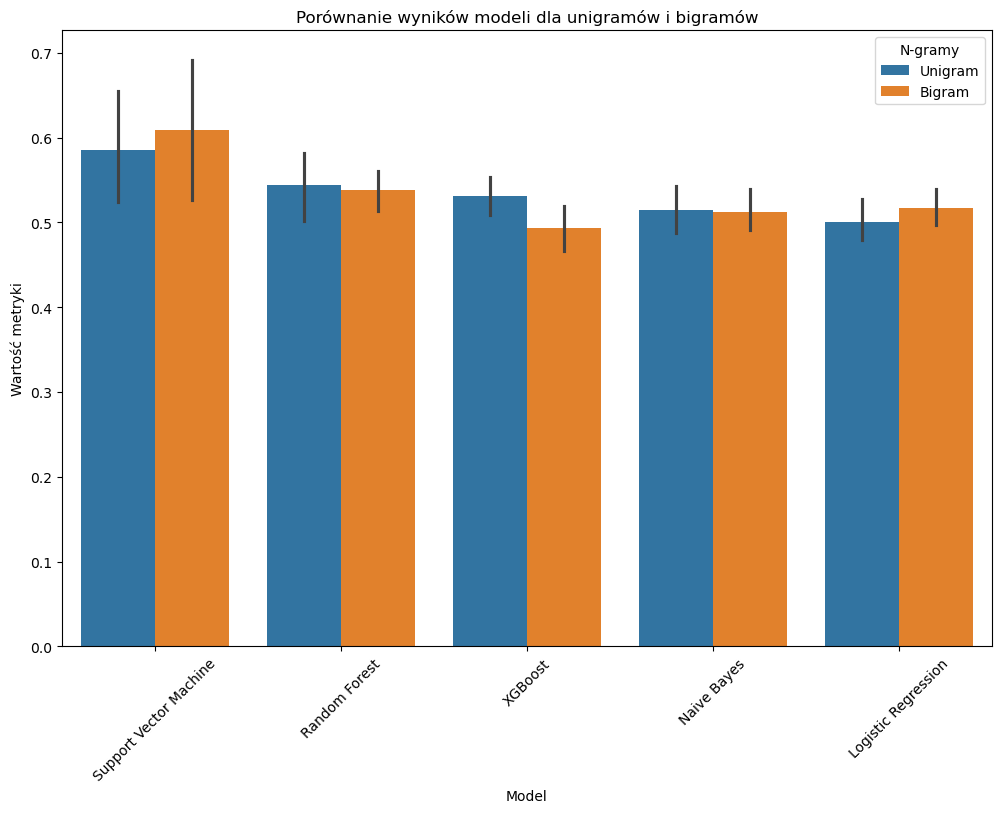

In [24]:
# Przygotowanie wektorów dla unigrams (n=1) i bigrams (n=2)
vectorizer_unigram = CountVectorizer(max_features=5000, stop_words="english", ngram_range=(1, 1))
vectorizer_bigram = CountVectorizer(max_features=5000, stop_words="english", ngram_range=(2, 2))

# Tworzenie macierzy cech
X_unigram = vectorizer_unigram.fit_transform(news_data_1["Combined_News"]).toarray()
X_bigram = vectorizer_bigram.fit_transform(news_data_1["Combined_News"]).toarray()

# Podział na zbiory treningowe i testowe
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(
    X_unigram, y, test_size=0.2, random_state=42
)
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(
    X_bigram, y, test_size=0.2, random_state=42
)

# Funkcja do treningu i oceny modeli
def evaluate_models(X_train, X_test, y_train, y_test, ngram_type):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Naive Bayes": MultinomialNB(),
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    }

    print(f"\n=== Wyniki dla {ngram_type} ===")
    results = []
    for name, model in models.items():
        # Trening modelu
        model.fit(X_train, y_train)
        # Predykcja
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": report["1"]["precision"],
            "Recall": report["1"]["recall"],
            "F1-Score": report["1"]["f1-score"],
            "AUC-ROC": auc,
        })

        # Wypisywanie wyników
        print(f"Model: {name}")
        print(f"  Accuracy: {acc:.4f}")
        if auc is not None:
            print(f"  AUC-ROC: {auc:.4f}")
        print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"  Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

    return pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

# Ewaluacja dla unigramów
results_uni = evaluate_models(X_train_uni, X_test_uni, y_train_uni, y_test_uni, "Unigramów")

# Ewaluacja dla bigramów
results_bi = evaluate_models(X_train_bi, X_test_bi, y_train_bi, y_test_bi, "Bigramów")

# Porównanie wyników w tabeli
print("\nPorównanie wyników dla unigramów i bigramów:")
results_uni["N-gram"] = "Unigram"
results_bi["N-gram"] = "Bigram"
comparison_df = pd.concat([results_uni, results_bi])
print(comparison_df)

# Wizualizacja porównania
plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df.melt(id_vars=["Model", "N-gram"]),
    x="Model",
    y="value",
    hue="N-gram",
)
plt.title("Porównanie wyników modeli dla unigramów i bigramów")
plt.xticks(rotation=45)
plt.ylabel("Wartość metryki")
plt.legend(title="N-gramy")
plt.show()

## Comment


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
if isinstance(X, (pd.Series, np.ndarray)):
    X1 = X.tolist()
else:
    X1 = X

X1 = [" ".join(str(x) for x in row) if isinstance(row, (list, tuple)) else str(row) for row in X1]
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X1, y, test_size=0.2, random_state=42)
advancedvectorizer = TfidfVectorizer(
    min_df=1,  # Przynajmniej w 1 dokumencie
    max_df=0.95,  # Nie więcej niż w 90% dokumentów
    max_features=200000,
    ngram_range=(1, 2)  # Jedno- i dwuwyrazowe frazy
)
X_train_tfidf = advancedvectorizer.fit_transform(X_train_tf)
X_test_tfidf = advancedvectorizer.transform(X_test_tf)

advancedmodel_tfid = LogisticRegression()
advancedmodel_tfid.fit(X_train_tfidf, y_train_tf)

y_pred = advancedmodel_tfid.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test_tf, y_pred))
print("Classification Report:\n", classification_report(y_test_tf, y_pred))

Accuracy: 0.5703517587939698
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02       171
           1       0.57      0.99      0.72       227

    accuracy                           0.57       398
   macro avg       0.54      0.50      0.37       398
weighted avg       0.54      0.57      0.42       398



## Comment


In [53]:
# Przekształć dane wejściowe na dane zgrupowane po dacie
news_data_2['Date'] = pd.to_datetime(news_data_2['Date'])

# Grupowanie po dacie i łączenie tekstów w jeden ciąg
grouped_news = news_data_2.groupby('Date')['News'].apply(' '.join).reset_index()

# Przekształć dane przy użyciu tego samego vectorizera
X_new_tfidf = advancedvectorizer.transform(grouped_news['News'])

# Predykcja na nowych danych
y_pred_new = advancedmodel_tfid.predict(X_new_tfidf)

# Dodajemy przewidywane etykiety do danych
grouped_news['Prediction'] = ['buy' if pred == 1 else 'sell' for pred in y_pred_new]

# Wyświetlamy wyniki
print(grouped_news[['Date', 'News', 'Prediction']])

# Łączenie danych giełdowych z wynikami predykcji
merged_data = pd.merge(stock_data, grouped_news, on='Date', how='left')

portfolio = 10000  # Początkowy stan portfela
stock_position = 0  # Początkowo nie mamy akcji


for i, row in merged_data.iterrows():
    action = row['Prediction']
    price = row['Close']

    if action == 'buy' and portfolio >= price:
        stock_position = portfolio / price  # Kupujemy akcje
        portfolio = 0  # Tracimy wszystkie pieniądze, bo kupujemy akcje
        print(f"Buying at {price}, portfolio now: {portfolio}")
    elif action == 'sell' and stock_position > 0:
        portfolio = stock_position * price  # Sprzedajemy akcje
        stock_position = 0  # Brak akcji po sprzedaży
        print(f"Selling at {price}, portfolio now: {portfolio}")

# Finalny stan portfela
print(f"Final portfolio value: {portfolio}")


           Date                                               News Prediction
0    2008-06-08  b'nim chimpsky: the tragedy of the chimp who t...       sell
1    2008-06-09  b'united states quits human rights council' b"...        buy
2    2008-06-10  b'oil shortage a myth says industry insider' b...        buy
3    2008-06-11  b'bbc uncovers lost iraq billions' b'war crimi...        buy
4    2008-06-12  b'did us attack pakistan last night? "pakistan...        buy
...         ...                                                ...        ...
2938 2016-06-27  barclays and rbs shares suspended from trading...        buy
2939 2016-06-28  2500 scientists to australia: if you want to s...       sell
2940 2016-06-29  explosion at airport in istanbul yemeni former...        buy
2941 2016-06-30  jamaica proposes marijuana dispensers for tour...        buy
2942 2016-07-01  a 117-year-old woman in mexico city finally re...       sell

[2943 rows x 3 columns]
Buying at 9985.80957, portfolio now: 0


In [75]:
y_pred_prob = advancedmodel_tfid.predict_proba(X_new_tfidf)
print(y_pred_prob)
# Ustal progi prawdopodobieństwa dla kupna (buy), sprzedaży (sell) oraz neutralności (neutral)
buy_threshold = 0.57
sell_threshold = 0.57

# Przypisz etykiety w zależności od prawdopodobieństwa
grouped_news['Prediction1'] = ['buy' if prob[1] >= buy_threshold else ('sell' if prob[0] >= sell_threshold else 'neutral') for prob in y_pred_prob]

# Wyświetlamy wyniki
print(grouped_news[['Date', 'News', 'Prediction1']])

# Łączenie danych giełdowych z wynikami predykcji
merged_data = pd.merge(stock_data, grouped_news, on='Date', how='left')

portfolio = 10000  # Początkowy stan portfela
stock_position = 0  # Początkowo nie mamy akcji
short_position = 0  # Początkowo nie mamy pozycji short (do grania na spadki)


for i, row in merged_data.iterrows():
    action = row['Prediction1']
    price = row['Close']

    if action == 'buy' and portfolio >= price:
        stock_position = portfolio / price  # Kupujemy akcje
        portfolio = 0  # Tracimy wszystkie pieniądze, bo kupujemy akcje
        print(f"Buying at {price}, portfolio now: {portfolio}")
    elif action == 'sell' and stock_position > 0:
        portfolio = stock_position * price  # Sprzedajemy akcje
        stock_position = 0  # Brak akcji po sprzedaży
        print(f"Selling at {price}, portfolio now: {portfolio}")
    

# Finalny stan portfela
print(f"Final portfolio value: {portfolio}")

[[0.65087844 0.34912156]
 [0.47289889 0.52710111]
 [0.36858581 0.63141419]
 ...
 [0.47289889 0.52710111]
 [0.47289889 0.52710111]
 [0.53014317 0.46985683]]
           Date                                               News Prediction1
0    2008-06-08  b'nim chimpsky: the tragedy of the chimp who t...        sell
1    2008-06-09  b'united states quits human rights council' b"...     neutral
2    2008-06-10  b'oil shortage a myth says industry insider' b...         buy
3    2008-06-11  b'bbc uncovers lost iraq billions' b'war crimi...     neutral
4    2008-06-12  b'did us attack pakistan last night? "pakistan...     neutral
...         ...                                                ...         ...
2938 2016-06-27  barclays and rbs shares suspended from trading...     neutral
2939 2016-06-28  2500 scientists to australia: if you want to s...        sell
2940 2016-06-29  explosion at airport in istanbul yemeni former...     neutral
2941 2016-06-30  jamaica proposes marijuana dispensers